***Importing Libraries***

import necessary libraries for data handling, plotting, modeling, and evaluation.

In [2]:
# import yfinance as yf
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

***Fetching Data***

Read the dataset downloaded from Yahoo Fianance

In [3]:

df=pd.read_csv(r'E:\Muqadas\ML internship\Task1\eth_usd_dataset.csv')

**Dataset Overview**

Check the size of the dataset

In [4]:
df.shape

(2610, 6)

show the first 5 rrows of dataset

In [5]:
df.head()

,Date,Close,High,Low,Open,Volume
0,NaN,ETH-USD,ETH-USD,ETH-USD,ETH-USD,ETH-USD
1,2017-11-09,320.8840026855469,329.4519958496094,307.0559997558594,308.6449890136719,893249984
2,2017-11-10,299.25299072265625,324.7179870605469,294.5419921875,320.6709899902344,885985984
3,2017-11-11,314.6809997558594,319.4530029296875,298.1919860839844,298.58599853515625,842300992
4,2017-11-12,307.9079895019531,319.15301513671875,298.51300048828125,314.69000244140625,1613479936


shows the last 5 rows of dataset

In [7]:
df.tail()

,Date,Close,High,Low,Open,Volume
2605,2024-12-26,3331.225830078125,3512.6044921875,3302.306396484375,3493.30419921875,22247726776
2606,2024-12-27,3328.9169921875,3436.710693359375,3302.57568359375,3331.0537109375,24091627403
2607,2024-12-28,3397.90234375,3419.920166015625,3318.033935546875,3328.774658203125,14305648523
2608,2024-12-29,3349.513427734375,3406.6484375,3321.664794921875,3397.862548828125,13440907792
2609,2024-12-30,3356.392578125,3428.52734375,3298.804443359375,3349.5859375,26981583962


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2609 non-null   object
 1   Close   2610 non-null   object
 2   High    2610 non-null   object
 3   Low     2610 non-null   object
 4   Open    2610 non-null   object
 5   Volume  2610 non-null   object
dtypes: object(6)
memory usage: 122.5+ KB


In [9]:
print(df.columns)

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [10]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2609,2610,2610,2610,2610,2610
unique,2609,2609,2609,2609,2609,2610
top,2024-12-30,3156.509521484375,1919.264404296875,1564.0318603515625,205.1739959716797,26981583962
freq,1,2,2,2,2,1


In [11]:
df = df.iloc[1:]


In [12]:
df.head()

,Date,Close,High,Low,Open,Volume
1,2017-11-09,320.8840026855469,329.4519958496094,307.0559997558594,308.6449890136719,893249984
2,2017-11-10,299.25299072265625,324.7179870605469,294.5419921875,320.6709899902344,885985984
3,2017-11-11,314.6809997558594,319.4530029296875,298.1919860839844,298.58599853515625,842300992
4,2017-11-12,307.9079895019531,319.15301513671875,298.51300048828125,314.69000244140625,1613479936
5,2017-11-13,316.71600341796875,328.4150085449219,307.0249938964844,307.0249938964844,1041889984


***Preprocessing Data***

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

1      2017-11-09
2      2017-11-10
3      2017-11-11
4      2017-11-12
5      2017-11-13
          ...    
2605   2024-12-26
2606   2024-12-27
2607   2024-12-28
2608   2024-12-29
2609   2024-12-30
Name: Date, Length: 2609, dtype: datetime64[ns]

In [14]:
df.set_index('Date', inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-11-09,320.8840026855469,329.4519958496094,307.0559997558594,308.6449890136719,893249984
2017-11-10,299.25299072265625,324.7179870605469,294.5419921875,320.6709899902344,885985984
2017-11-11,314.6809997558594,319.4530029296875,298.1919860839844,298.58599853515625,842300992
2017-11-12,307.9079895019531,319.15301513671875,298.51300048828125,314.69000244140625,1613479936
2017-11-13,316.71600341796875,328.4150085449219,307.0249938964844,307.0249938964844,1041889984


In [15]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
print(f"start date: {df.index.min()}")
print(f"end date: {df.index.max()}")


start date: 2017-11-09 00:00:00
end date: 2024-12-30 00:00:00


In [17]:
df[['Close', 'High', 'Low', 'Open', 'Volume']] = (
    df[['Close', 'High', 'Low', 'Open', 'Volume']]
    .replace({',' : '', '/$' : '', ' ': ''}, regex=True)
    .apply(pd.to_numeric, errors='coerce')
)


***Exploratory Data Analysis (EDA):***

**Statistical Analysis**

In [18]:
df.describe()

,Close,High,Low,Open,Volume
count,2609.000000,2609.000000,2609.000000,2609.000000,2.609000e+03
mean,1490.773764,1530.573913,1445.274314,1489.776234,1.301809e+10
std,1226.266551,1258.805914,1189.917204,1226.214741,1.059053e+10
min,84.308296,85.342743,82.829887,84.279694,6.217330e+08
25%,268.704041,274.320831,261.960510,268.692261,5.556444e+09
50%,1352.837158,1390.589966,1308.991455,1353.205078,1.061841e+10
75%,2405.181152,2472.187744,2322.337158,2401.256348,1.768550e+10
max,4812.087402,4891.704590,4718.039062,4810.071289,8.448291e+10


**Line plot of price over time**

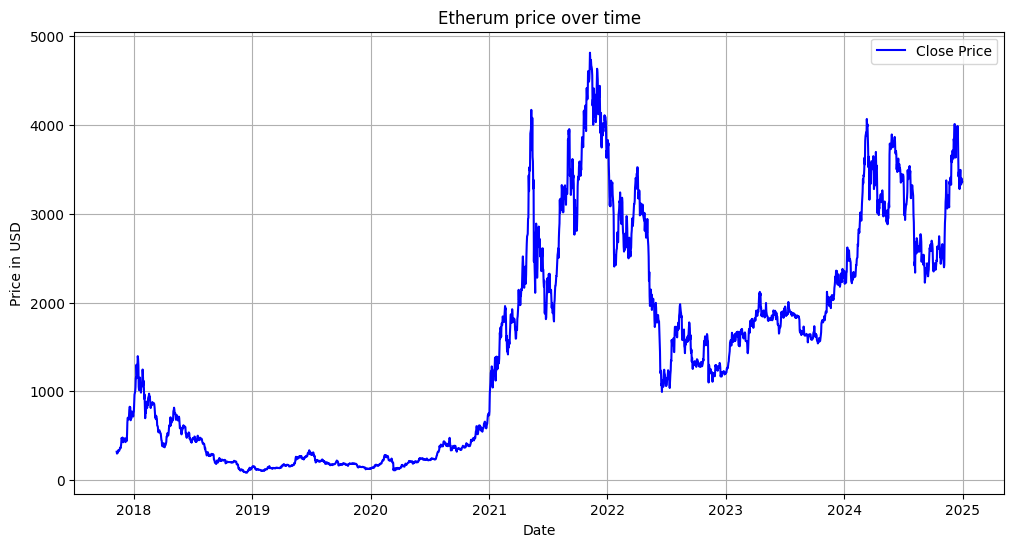

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Etherum price over time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

**Rooling Averages**

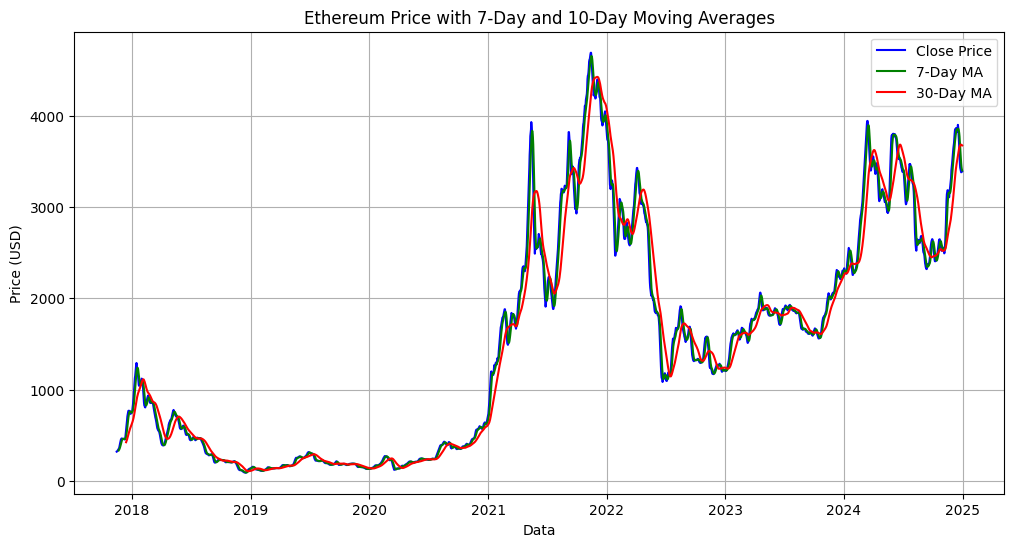

In [20]:
df['Close'] =  df['Close'].rolling(window=7).mean()
df['Close_7'] = df['Close'].rolling(window=7).mean()
df['Close_30'] = df['Close'].rolling(window=30).mean()


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['Close_7'], label='7-Day MA', color='green')    
plt.plot(df['Close_30'], label='30-Day MA', color='red')
plt.title("Ethereum Price with 7-Day and 10-Day Moving Averages") 
plt.xlabel('Data') 
plt.ylabel("Price (USD)") 
plt.legend() 
plt.grid(True)
plt.show() 


**Volume trend over Time**

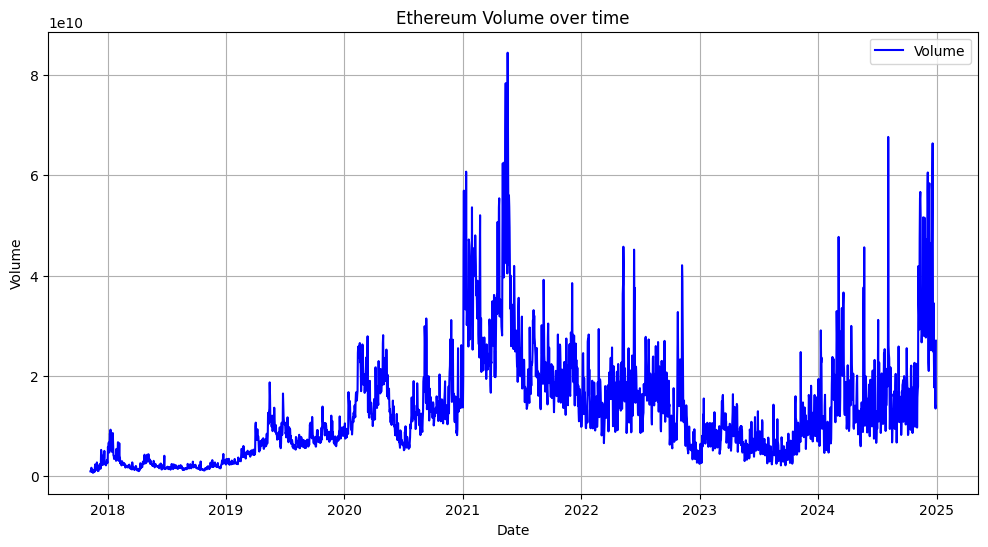

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Volume', color='blue')
plt.title('Ethereum Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

**Volatility Analysis**

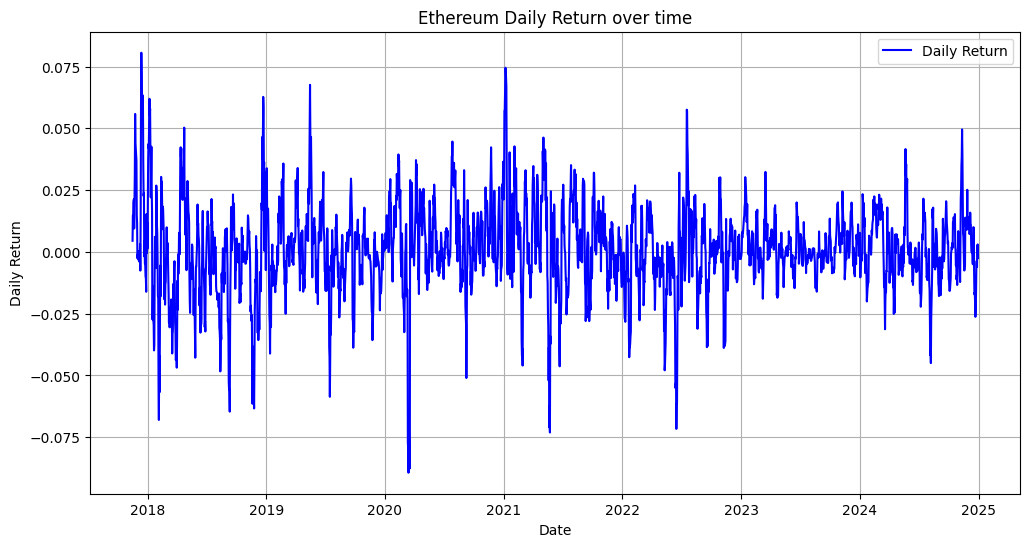

In [22]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'], label='Daily Return', color='blue')
plt.title('Ethereum Daily Return over time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

**Outliers**

<Axes: ylabel='Close'>

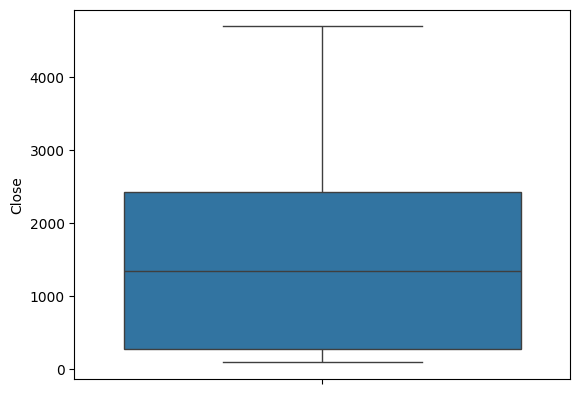

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['Close'])


In [25]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]

print("Number of outliers detected:", len(outliers))
print("\nOutlier values:")
print(outliers['Close'])

Number of outliers detected: 0

Outlier values:
Series([], Name: Close, dtype: float64)


In [26]:
mean_price = df['Close'].mean()
std_price = df['Close'].std()
print(f"Mean price: {mean_price}")

threshold= 3
outliers = df[(df['Close'] - mean_price).abs() > threshold * std_price]
print("Number of outliers detected:", len(outliers))
print("\nOutlier values:")
print(outliers['Close'])

Mean price: 1489.9734482025906
Number of outliers detected: 0

Outlier values:
Series([], Name: Close, dtype: float64)


***Stationary Testing:***

**Importing Libraries**

In [27]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd


**ADF Test**

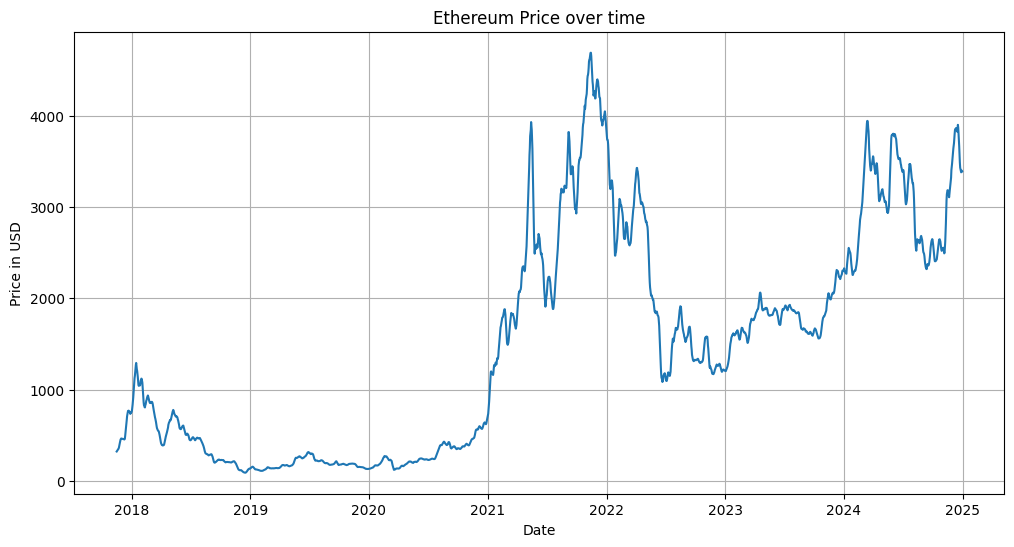

/n  ADF Test on  Price ADF Test
ADF Statistic: -1.3767844710931174
p-value: 0.5933539525469906
Lags Used: 28
Number of Observations Used: 2573
Critical Values:
   1%: -3.4328940481540635
   5%: -2.862663960978616
   10%: -2.5673683255817044
Fail to reject the null hypothesis (series is non-stationary)


In [36]:
def adf_test(series, series_name='ADF Test'):
    result = adfuller(series, autolag='AIC')
    print(f'/n  {series_name} ADF Test')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Lags Used:', result[2])
    print('Number of Observations Used:', result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis (series is stationary)")
    else:
        print("Fail to reject the null hypothesis (series is non-stationary)")


plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Ethereum Price over time')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.grid(True)
plt.show()

adf_test(df['Close'], 'ADF Test on  Price')
# If df has multi-level columns like ('Close', 'ETH-USD')
# cleaned_series = df[('Close', 'ETH-USD')].dropna()

# # Then call the test
# adf_test(cleaned_series, 'ADF Test on Price')


**Differencing and Re-test**

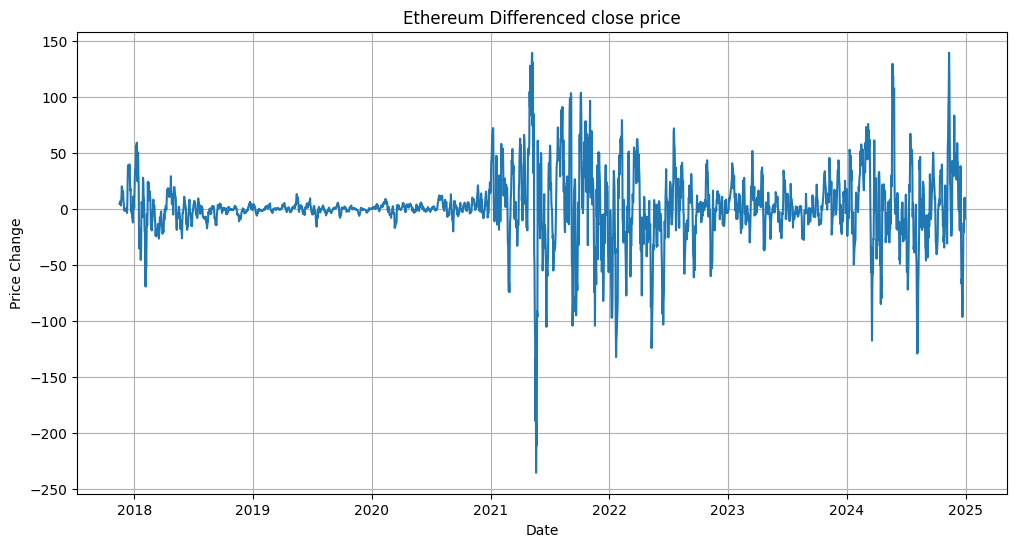

/n  ADF Test on Differenced Price ADF Test
ADF Statistic: -7.043630218824061
p-value: 5.761268225036238e-10
Lags Used: 28
Number of Observations Used: 2572
Critical Values:
   1%: -3.4328950382761456
   5%: -2.862664398228024
   10%: -2.567368558377212
Reject the null hypothesis (series is stationary)


In [37]:
df['Close_diff'] = df['Close'].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'])
plt.title('Ethereum Differenced close price')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

adf_test(df['Close_diff'].dropna(), 'ADF Test on Differenced Price')


***ARIMA Model Development:***

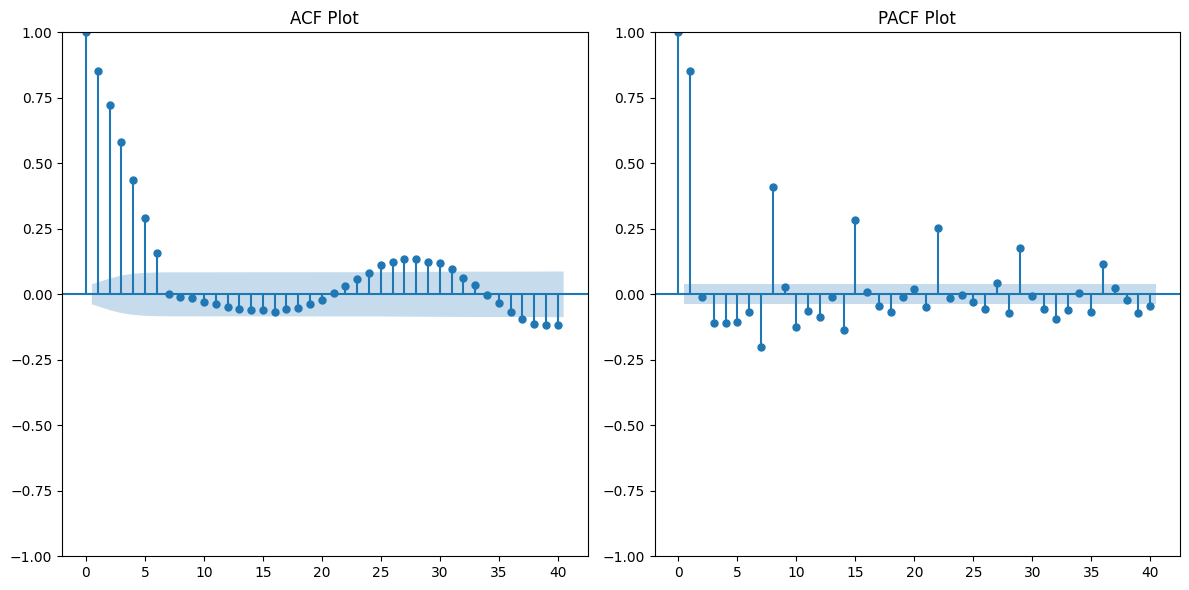

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


diff_Close = df['Close'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(diff_Close, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(diff_Close, ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF Plot')


plt.tight_layout()
plt.show()



**Fitting Arima Multiple Models**

In [47]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

for p in range(1, 4):
    for d in range(1, 3):
        for q in range(1, 4):
            try:
                model = ARIMA(df['Close'], order=(p, d, q))
                results = model.fit()
                print(f'ARIMA({p}, {d}, {q}) - AIC: {results.aic}')
            except:
                continue

ARIMA(1, 1, 1) - AIC: 21663.142863674766
ARIMA(1, 1, 2) - AIC: 21640.95949929866
ARIMA(1, 1, 3) - AIC: 21632.247909265418
ARIMA(1, 2, 1) - AIC: 21813.966577913394
ARIMA(1, 2, 2) - AIC: 21842.70211414356
ARIMA(1, 2, 3) - AIC: 21844.21914063895
ARIMA(2, 1, 1) - AIC: 21637.1621393939
ARIMA(2, 1, 2) - AIC: 21572.58397583529
ARIMA(2, 1, 3) - AIC: 22403.330438009423
ARIMA(2, 2, 1) - AIC: 21661.499956763073
ARIMA(2, 2, 2) - AIC: 21416.957730255333
ARIMA(2, 2, 3) - AIC: 21415.255961963398
ARIMA(3, 1, 1) - AIC: 21583.017447255446
ARIMA(3, 1, 2) - AIC: 21251.45342131458
ARIMA(3, 1, 3) - AIC: 21240.417112256848
ARIMA(3, 2, 1) - AIC: 21844.696504893847
ARIMA(3, 2, 2) - AIC: 21457.915611312703
ARIMA(3, 2, 3) - AIC: 21415.8578461502


**Fitting Final Arima Model**

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2081
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8568.465
Date:                Mon, 19 May 2025   AIC                          17146.929
Time:                        21:28:57   BIC                          17175.130
Sample:                    11-16-2017   HQIC                         17157.263
                         - 07-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0422      0.022     -1.903      0.057      -0.086       0.001
ar.L2          0.7760      0.020     38.121      0.000       0.736       0.816
ma.L1         -0.1552      0.081     -1.908      0.0

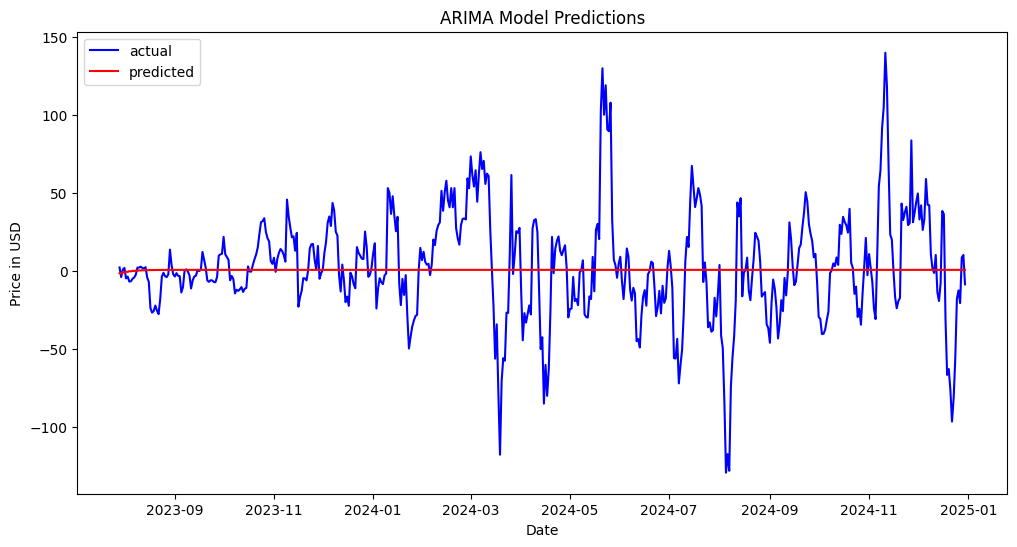

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

model_2= ARIMA(train['Close_diff'], order=(2, 1, 2))
model_2_fit = model_2.fit()
print(model_2_fit.summary())

predictions = model_2_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close_diff'], label='actual', color='blue')
plt.plot(test.index, predictions, label='predicted', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 2081
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8568.465
Date:                Mon, 19 May 2025   AIC                          17146.929
Time:                        21:31:22   BIC                          17175.130
Sample:                    11-16-2017   HQIC                         17157.263
                         - 07-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0422      0.022     -1.903      0.057      -0.086       0.001
ar.L2          0.7760      0.020     38.121      0.000       0.736       0.816
ma.L1         -0.1552      0.081     -1.908      0.0

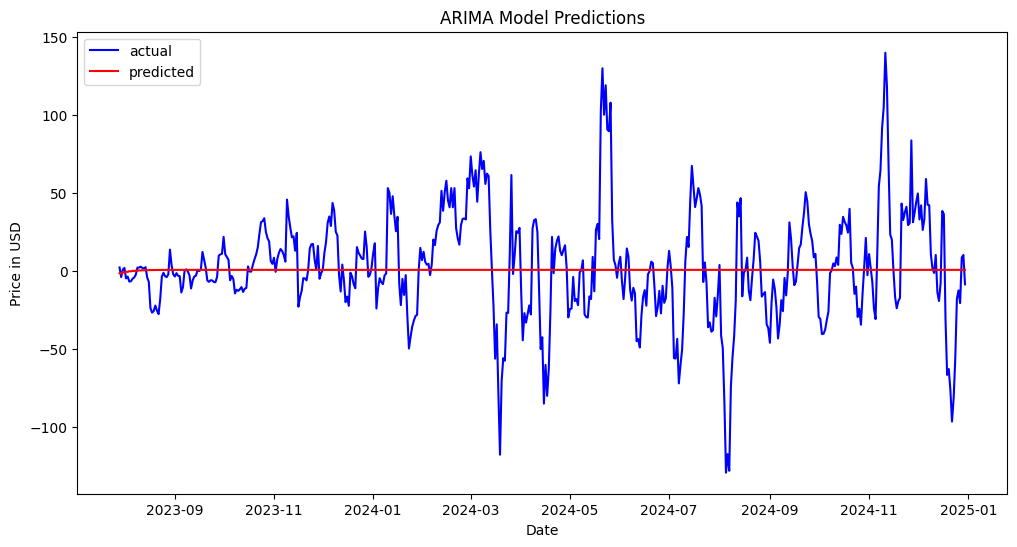

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

model_1= ARIMA(train['Close_diff'], order=(2, 1, 2))
model_1_fit = model_1.fit()
print(model_1_fit.summary())

predictions1 = model_1_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close_diff'], label='actual', color='blue')
plt.plot(test.index, predictions1, label='predicted', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

***Model Evaluation:***

In [54]:
import numpy as np  
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse_2=  mean_squared_error(test['Close_diff'], predictions)
rmse_2= np.sqrt(mse_2)  
print(f'RMSE: {rmse_2}')

mape_2= np.mean(np.abs((test['Close_diff'] - predictions) / test['Close_diff'])) * 100
print(f'MAPE: {mape_2}')


mse1= mean_squared_error(test['Close'], predictions1)
rmse1= np.sqrt(mse1)
print(f'RMSE: {rmse1}')
mape1= np.mean(np.abs((test['Close'] - predictions1) / test['Close'])) * 100
print(f'MAPE: {mape1}')



RMSE: 34.729333347632576
MAPE: 122.13848229931519
RMSE: 2769.233310925788
MAPE: 99.9717596793651


***Forecasting and Visualization:***

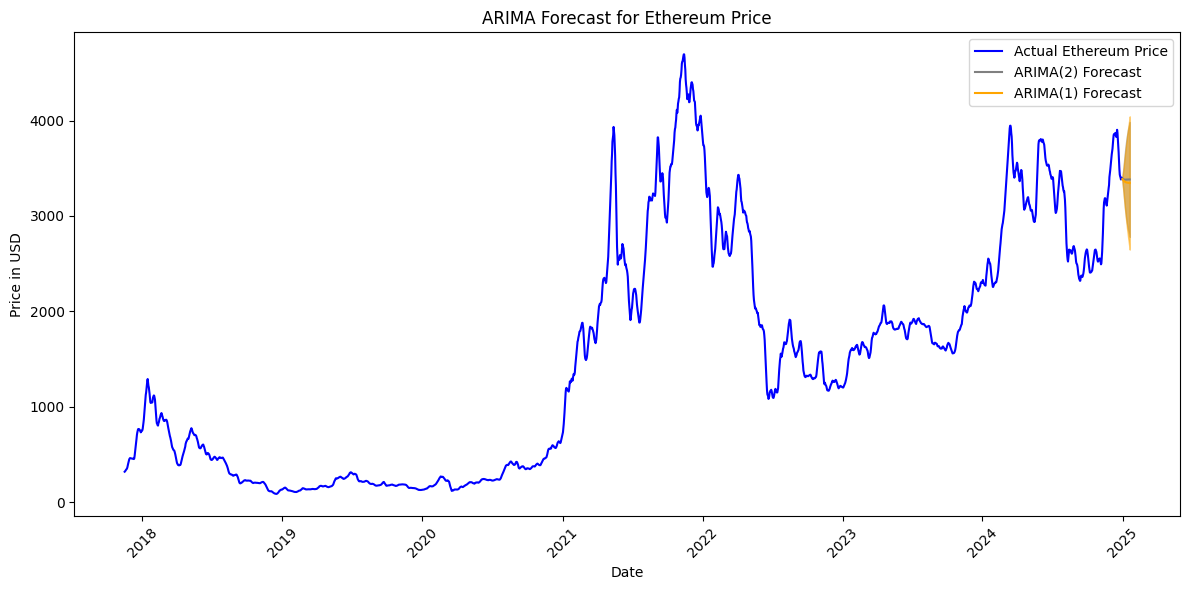

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model_2= ARIMA(df['Close'], order=(2,1,2))
model_2_fit= model_2.fit()

model_1= ARIMA(df['Close'], order=(1,1,1))
model_1_fit= model_1.fit()


forecast_steps= 20
forecast_2_result= model_2_fit.get_forecast(steps=forecast_steps, alpha= 0.05)
forecast_2= forecast_2_result.predicted_mean
conf_2= forecast_2_result.conf_int(alpha=0.05)

forecast_1_result= model_1_fit.get_forecast(steps=forecast_steps, alpha= 0.05)
forecast_1= forecast_1_result.predicted_mean
conf_1= forecast_1_result.conf_int(alpha=0.05)

forecast_dates= pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq= 'D')[1:]

plt.figure(figsize=(12, 6))

plt.plot(df['Close'], label='Actual Ethereum Price', color='blue')

plt.plot(forecast_dates, forecast_2, label='ARIMA(2) Forecast', color='gray')
plt.fill_between(forecast_dates, conf_2.iloc[:, 0], conf_2.iloc[:, 1], color='gray', alpha=0.5)

plt.plot(forecast_dates, forecast_1, label='ARIMA(1) Forecast', color='orange')
plt.fill_between(forecast_dates, conf_1.iloc[:, 0], conf_1.iloc[:, 1], color='orange', alpha=0.5)


plt.title('ARIMA Forecast for Ethereum Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
